In [1]:
'''
Boston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
Data has white spaces, not commas.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

"\nBoston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html\nData has white spaces, not commas.\n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n prices and the demand for clean air', J. Environ. Economics & Management,\n vol.5, 81-102, 1978\n\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rat

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data and arrange into Pandas dataframe
dataset = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
dataset.columns = feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot: xlabel='TAX', ylabel='Count'>

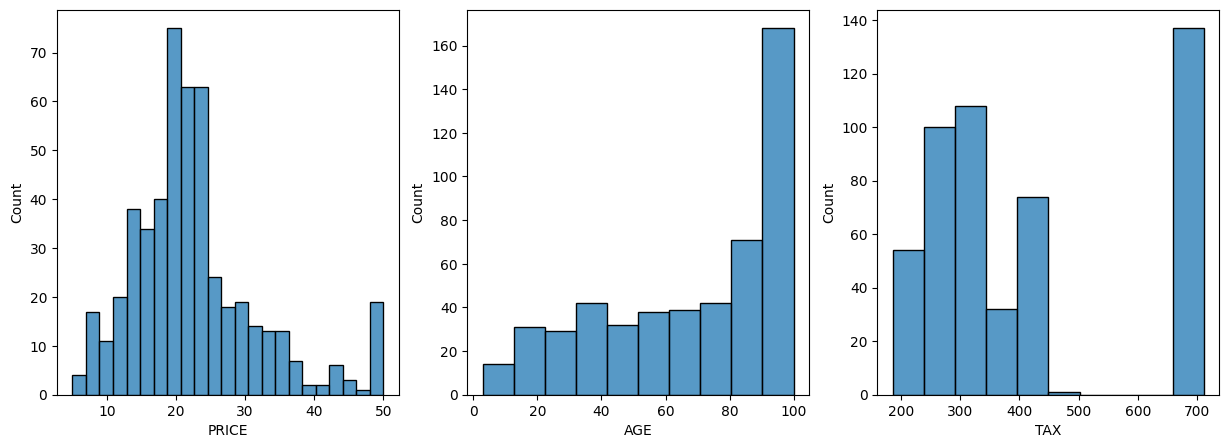

In [6]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(dataset['PRICE'], ax=ax[0])
sns.histplot(dataset['AGE'], ax=ax[1])
sns.histplot(dataset['TAX'], ax=ax[2])

<AxesSubplot: xlabel='B', ylabel='PRICE'>

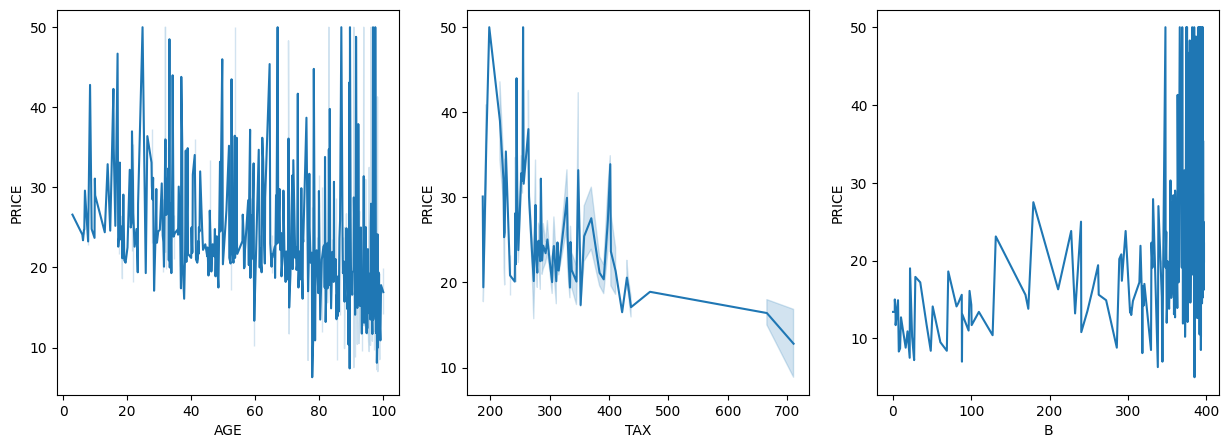

In [7]:
# Understand the data further. 
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.lineplot(x=dataset['AGE'], y=dataset['PRICE'], ax=ax[0])
sns.lineplot(x=dataset['TAX'], y=dataset['PRICE'], ax=ax[1])
sns.lineplot(x=dataset['B'], y=dataset['PRICE'], ax=ax[2])

In [8]:
# Split into features and target (Price)
from sklearn.model_selection import train_test_split

x = dataset.drop('PRICE', axis = 1)
y = dataset['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [9]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# First hidden layer with 128 and input = 13
model.add(Dense(128, input_dim=13, activation='relu'))

# Second hidden layer with 64 unit
model.add(Dense(64, activation='relu'))

# Output layer with one unit
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train_scaled, y_train, epochs =100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
13/13 [==============================] - 1s 30ms/step - loss: 563.3597 - mae: 21.7399 - val_loss: 454.4655 - val_mae: 19.7092
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 475.0200 - mae: 19.5422 - val_loss: 364.2919 - val_mae: 17.3616
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 353.5919 - mae: 16.3218 - val_loss: 246.7915 - val_mae: 14.0238
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 212.2285 - mae: 12.1290 - val_loss: 126.7965 - val_mae: 9.7493
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 103.9981 - mae: 8.0947 - val_loss: 62.9594 - val_mae: 6.5120
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 63.5840 - mae: 6.0124 - val_loss: 41.4460 - val_mae: 4.9897
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 42.5889 - mae: 4.8092 - val_loss: 28.7478 - val_mae: 4.1471
Epoch 8/100
13/13 [==============================] -

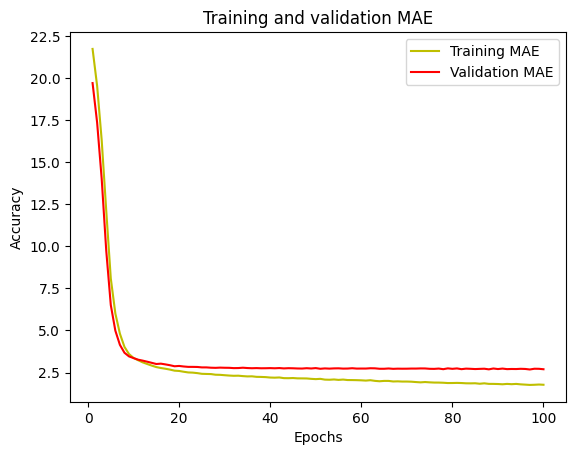

In [12]:
# Plot the training and validation accuracy at each epoch
acc = history.history['mae']
val_acc = history.history['val_mae']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

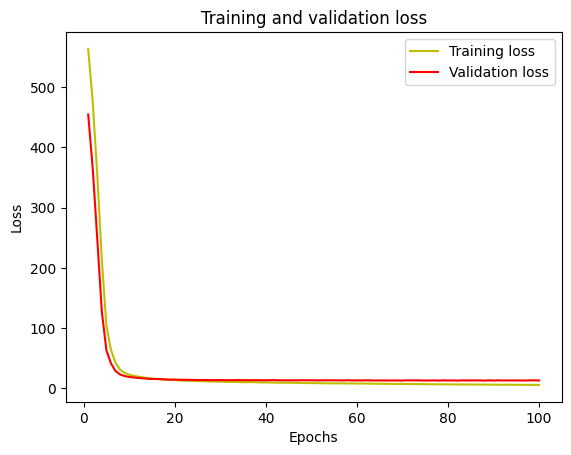

In [13]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Predict on test data
predictions = model.predict(x_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 132ms/step
Predicted values are:  [[19.274754]
 [19.11372 ]
 [19.205807]
 [21.092188]
 [13.278032]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


C:\Users\chsai\AppData\Local\Temp\ipykernel_9720\749106835.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Real values are: ", y_test[:5])
